<a href="https://colab.research.google.com/github/mpudig/MATH5271/blob/main/MATH5271_Lab_4_Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH5271 Lab 4

# Principle Component Analysis

Welcome to the 4th MATH5271 lab session. In this lab we will discuss Principle Component Analysis. By the end of this lab you should be able to:

- Compute and visualise the priciple componenets of 1D data set with two variables using basic matrix algebra;
- Load and interogate a 2D sea surface temperature field using xarray;
- Compute the priciple components of a 1D slice of the 2D times series.

## Google Colaboratory

We will run the python labs in [Google Colaboratory](colab.research.google.com). Google Colab is a web-based computational environment in which you can read, write, and execute interactive *notebooks* like the one you are reading. The python code runs on a virtual machine in the cloud, so you don't need to install python on your local machine. 

Before you begin the lab, you will need to [sign up](https://accounts.google.com/signup) for a free Google account. If you do not wish to sign up for a Google account, that's fine: you will still be able to read through the lab. You just won't be able to make edits or run any code. 

## Colaboratory and Google Drive

If you have a Google account, you can mount your Google drive within the Colab environment by copying and pasting the code below into a new cell (click "+ Code"). This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). 
```
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'
```

## 1. Setup and Load Data

Before we get started we need to ensure we have the appropriate 'libraries' are installed. You can think of these as opening a box of available tools. The .csv files we upload will be uploaded into a 'pandas' data frame. We will use the 'numpy' (numerical python) package to do some basic maths with the data and Matplotlib's 'pyplot' package to make some pretty graphs. 

In this lab we will also use xarray which is an extremely powerful and user frieldly tool for analysis of large multi-dimensional data sets. Here is a more in depth [tutorial](http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html) just on xarray that I have built the second half of this lab from.

There are many other packages and libraries avaialble freely in python. We will experiment with a few in this course but will only really scratch the surface. I will try to keep things as simple as possible so we can focus on understanding - rather than trouble shooting technical issues.

In [ ]:
# import libraries
import pandas as pd
import xarray as xr

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

The first data set we look at will be example data table A1 from Wilks as we used in Lab 1.

We will load the data table as a pandas 'DataFrame'. This is a 2-dimensional data structure that can store data of different types and has inbuilt operations (like calcualting statistics and doing basic plots).

In [ ]:
# Define the URL where the data set is stored
TableA1_url = 'https://raw.githubusercontent.com/janzika/MATH5271/main/Wilks_TableA1.csv' 

# Import the data set as a Pandas Dataframe using the 'read_csv' function
df1 = pd.read_csv(TableA1_url)

## 2. Basics of PCAs

Consider a data set with $n$ observations of K anomaly (mean = 0) variables 
$$X = \begin{bmatrix}\bf{x}_{1} & \bf{x}_{2} & ... & \bf{x}_{K}
\end{bmatrix}\\
=\begin{bmatrix}x_{11} & x_{12} & ... & x_{1K}\\
x_{21} & x_{22} & ... & x_{2K}\\
... & ... & ... & ...\\
x_{n1} & x_{n2} & ... & x_{nK}
\end{bmatrix}\\
$$

The 1st principle component $\bf{u}_1$ is the linear combination of the K variables that gives the largest variance. For it to be a linear combination we need to find the unit vector ${\bf e}_1$ such that 

$${\bf{u}}_1 ={\bf e}_{1}^{\text{T}}{\bf x}_k = \sum_{k=1}^K e_{k1}{\bf x}_k.$$

Let's use the Ithaca minimum temperature anomaly as $\bf{x}_{1}$ and Canandaigua as $\bf{x}_{2}$ to illustrate how this works.

In this case we have $K=2$, $n= 31$, $x_{11}$ is the Ithica minimum temperature on the 1st of January etc.

First lets compute these and display a scatter plot

Text(0, 0.5, "Canandaigua min. temp. anom. ($x'_2$, $^{\\circ}$F)")

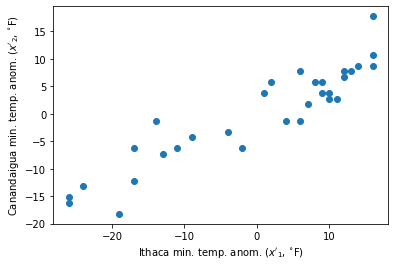

In [ ]:
# Subset just the Ithaca and Canandaigua data and compute their anomalies
idf = df1[df1['Location'].isin(['Ithaca'])]
x1 = idf.MinTemp_Far-idf.MinTemp_Far.mean()
cdf = df1[df1['Location'].isin(['Canandaigua'])]
x2 = cdf.MinTemp_Far-cdf.MinTemp_Far.mean()
# Make the plot using matplotlib (plt)
plt.scatter(x1,x2)
plt.xlabel('Ithaca min. temp. anom. ($x\'_1$, $^{\circ}$F)')
plt.ylabel('Canandaigua min. temp. anom. ($x\'_2$, $^{\circ}$F)')

Since we only have 2 variables ($K=2$), our challenge now is to find the best 2 numbers, $e_{11}$ and $e_{21}$, such that $e_{11}^2+e_{21}^2=1$ and the variance of $u_1 = {\bf{x}}_{1}e_{11}+{\bf{x}}_2e_{21}$ is maximised.

Basically what  we  are  looking for is the direction in the  above  plot along which things are varying the most. 

To find this direction, in a very brute force way, let's define the set of possible vectors in terms of an angle $\theta$ anti-clockwise from the ${x}_1$ axis such that $(e_{11},e_{21}) = (\cos(\theta),\sin(\theta))$.

[array(0.56548668), 246.5286873197227, 0.8443279255020151, 0.5358267949789967]

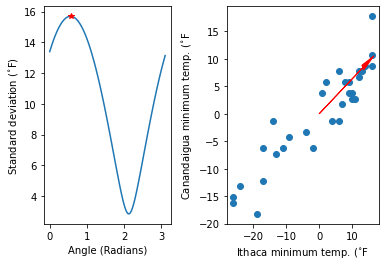

In [ ]:
theta = np.arange(0,np.pi,np.pi/100) # Create 100 angles from 0 to pi
u_var = np.zeros_like(theta) # Pre allocate variances
#Loop through each of the angles and store the variance for each
for i in np.arange(0,theta.shape[0]):
  u1 = (np.cos(theta[i])*x1.values)+(np.sin(theta[i])*x2.values)
  u_var[i] = np.var(u1)

#Identify the maximum
maxvar = np.max(u_var)
theta_u1 = theta[np.where(u_var==maxvar)].squeeze()

#Plot the resultiong varince as a function of angle
plt.subplot(1,5,(1,2))
plt.plot(theta,np.sqrt(u_var))
plt.plot(theta_u1,np.sqrt(maxvar),'r*')
plt.xlabel('Angle (Radians)')
plt.ylabel('Standard deviation ($^{\circ}$F)')

plt.subplot(1,2,2)
plt.scatter(x1,x2)
plt.arrow(0,0,np.cos(theta_u1)*np.sqrt(maxvar),\
          np.sin(theta_u1)*np.sqrt(maxvar),\
          head_width=1,head_length=4, fc='r', ec='r')
plt.xlabel('Ithaca minimum temp. ($^{\circ}$F')
plt.ylabel('Canandaigua minimum temp. ($^{\circ}$F')
np.sqrt(u_var[50])
[theta_u1,(maxvar),np.cos(theta_u1),np.sin(theta_u1)]


So the best angle we found was at $\theta$ = 0.56 radians which gave us a standard deviation of $\bf u_1$  of 15.7$^{\circ}$F and implied ${\bf u}_1 = 0.844{\bf x}_1 +0.536{\bf x}_2$. (Note $\theta=0.56+\pi$ and ${\bf u}_1 = -0.844{\bf x}_1 -0.536{\bf x}_2$ is also valid.)

What we have essentially done is rotated the dimensions until we found the direction along which the largest variance occurs.

We can extend this to $n$ dimensions and find not only the first but all the principle componenents $\bf{u_1, u_2, ..., u_n}$ ordered in terms of how much variance they explain. 

In the language of linear algebra, the set of principle components is related to the set of 'eigenvectors' $\bf{e_1, e_2, ..., e_n}$ such that

$$S = \begin{bmatrix}s_{11} & s_{12} & ... & s_{1K}\\
s_{21} & s_{22} & ... & s_{2K}\\
... & ... & ... & ...\\
s_{K1} & s_{K2} & ... & s_{KK}
\end{bmatrix}
$$
where $s_{kl}$ is the `covariance' of variable $\bf x_k$ and $\bf x_l$. 

$$s_{kl} = \frac{1}{n-1}\sum_{i=1}^n(x_{nk} - \overline{x}_{k})(x_{nl} - \overline{x}_{l}).
$$

The $u$ variables at observation $i$ (1$\leq i\leq$ n) are given by

$$\begin{bmatrix}
{u}_{i1}\\ {u}_{i2} \\ ... \\ {u}_{iK}
\end{bmatrix}
=\begin{bmatrix}e_{11} & e_{12} & ... & e_{1K}\\
e_{21} & e_{22} & ... & e_{2K}\\
... & ... & ... & ...\\
e_{K1} & e_{K2} & ... & e_{KK}
\end{bmatrix}^T
\begin{bmatrix}
{x}_{i1}\\ {x}_{i2} \\ ... \\ {x}_{iK}
\end{bmatrix}\\
=\begin{bmatrix}{\bf e}_{1} & {\bf e}_{2} & ... & {\bf e}_{K}
\end{bmatrix}^T
\begin{bmatrix}
{x}_{1i}\\ {x}_{2i} \\ ... \\ {x}_{Ki}
\end{bmatrix}.
$$

Let's try going through this carefully for the Ithaca and Canandaigua data.

First let's compute the covariance matrix, it's eigenvalues and eigenvectors.


In [ ]:
# Get n (number of days of observations)
n = x1.shape[0]
# Compute the 2x2 covariance matrix
S = [[ (1/(n-1))*np.sum(x1**2) , (1/(n-1))*np.sum(x2.values*x1.values) ],\
     [ (1/(n-1))*np.sum(x1.values*x2.values) , (1/(n-1))*np.sum(x2**2)]] 
#The mean has already been subtracted
S

[[185.46666666666667, 110.80000000000001],
 [110.80000000000001, 77.58064516129032]]

Recall that the eigenvalues ($\lambda$) of  the  matrix A satisfy
$$A = I\lambda   (1)$$ 
where $I$ is the identity matrix and the eigenvectors ($\bf e$) satisfy
$$ A {\bf e} = \lambda {\bf e}.   (2)$$
If you never got the point of eigenvectors and eigenvalues noe is the time!

Our matrix, S, is empirical so we can't do it eaisily by hand. Lets use numpy's linear algebra package instead.






In [ ]:
lam, E = np.linalg.eig(S)
print(lam)
print(E)

[254.75712705   8.29018477]
[[ 0.84785912 -0.53022156]
 [ 0.53022156  0.84785912]]


The first pair of numbers are the eigenvalues ($\lambda$) and remaining array is our eigenvectors (E). Notice that the first and largest eigenvalue corresponds very closely to the variance and the eigenvector corresponds to the vector we found earlier and they are exactly as in Wilks.

So the eigenvectors of the covariance matrix identify the direction of greatest co-variance in our data and the eigenvalues identify the magnitude of that co-variance.

## 3. PCA of a 2D Sea Surface Temperature (SST) timeseries

Now we are going to use a different type of data structure called xarray which is closely linked to the file format 'netcdf'.

The initial data loading and manipulation done below was inspired by http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html.

There is a lot of data in these files and we don't want to download it all into memory. So we are just going to 'mount' the appropriate directory which requires us to use 'bash'.

In [ ]:
%%bash
# Mounting requires a special 'bash' command
git clone https://github.com/pangeo-data/tutorial-data.git

fatal: destination path 'tutorial-data' already exists and is not an empty directory.


Now we are still not going to load the data but just 'open' the files and take a cursory look.

In [ ]:
ds_all = xr.open_mfdataset('./tutorial-data/sst/*nc', combine='by_coords')
ds_all

,Array,Chunk
Bytes,43.83 MB,768.96 kB
Shape,"(684, 89, 180)","(12, 89, 180)"
Count,171 Tasks,57 Chunks
Type,float32,numpy.ndarray


As you can see there is a bit of metadata describing the nature of the data set and links to further documentation. This is sea water temperature inferred at the sea surface in degrees celsius averaged for each month.

Like Pandas, an xarray data frame has it's own in-built functionality inclduing for taking means and plotting. 

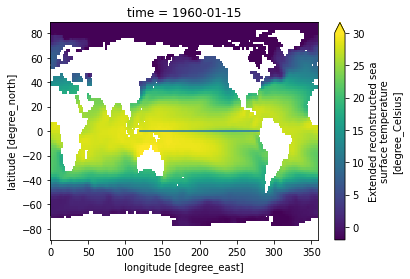

In [ ]:
# Define a variable for just the SST data
sst = ds_all.sst
# Simply 'plot' it for the 1st month available
sst.sel(time='1960-01-15').plot(vmin=-2, vmax=30)
# Draw a line on the plot where we are going to sub-sample
eqslc = [120,280];
plt.plot(eqslc,[0,0])

As you can see the plotting is really nice and convenient. We can also grab just a slice of the data as follows:

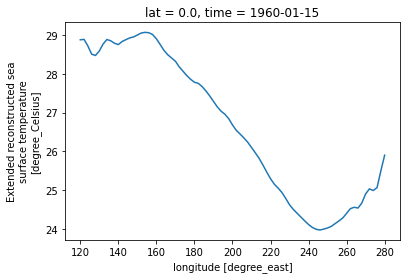

In [ ]:
# Selelct the date, latitude and range of longitudes
sst.sel(time='1960-01-15',lat=0,lon=slice(eqslc[0],eqslc[1])).plot()

And we can plot this slice as a function of time.

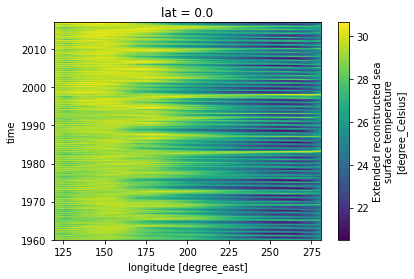

In [ ]:
# Plot the temperature over time at a latitude and for a range of longitudes
sst.sel(lat=0,lon=slice(eqslc[0],eqslc[1])).plot()

Let's subtract of the mean and remove (crudely) the seasonal cycle.

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


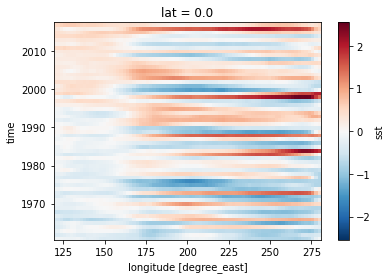

In [ ]:
# Compute the mean over 'time'
sst_mean = sst.mean(dim='time')
# Compute the annual average and subtract the mean to get the annual anomaly
sst_annual_anom = sst.resample(time='A').mean(dim='time')-sst_mean
# Now take the equatorial slice
eq_sst_an_anom = sst_annual_anom.sel(lat=0,lon=slice(eqslc[0],eqslc[1]))
# Plot it
eq_sst_an_anom.plot()

As before, we want to compute the covariance matrix. Numpy has function for this - we just have to make sure we tell it the right dimensions to sum over (we want to get a KxK rather than and NxN matrix. 

Then we can compute the eigenvalues and eigenvectors as before.

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([2.79908037e+01, 4.06279206e+00, 1.87195391e+00, 6.87638387e-01,
       3.53210251e-01, 1.52626124e-01, 8.08937388e-02, 6.31293219e-02,
       4.33733754e-02, 1.44154024e-02])

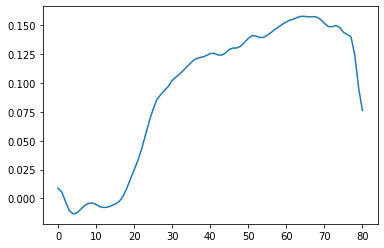

In [ ]:
# Compute the covariance of the equatorial Pacific SST
cov_eq_sst = np.cov(eq_sst_an_anom,rowvar=False)
# Compute the eigenvalues and eigenvectors
lam , E =np.linalg.eig(cov_eq_sst)
#Plot e1 and show 1st 10 eigenvectors 
plt.plot(e[:,0])
np.real(lam[0:10])

Interestingly the eigenvalues drop off very quickly. Let's see what the 1st principle componenent looks like by multiplying $\bf e_1$ by $\bf x$ and summing over all dimensions (in this case all longitudes).

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


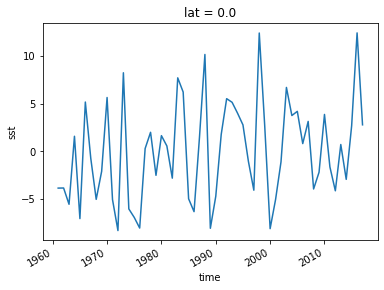

In [ ]:
e1x = np.real(e[:,0])*eq_sst_an_anom
u1 = e1x.sum(dim='lon')
u1.plot()

Now let's see what the 1D timeseries would look like if we approximated it based on the 1st PCA

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


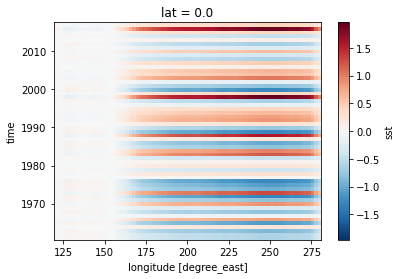

In [ ]:
x_PCA1 = np.real(e[:,0])*(1+0*eq_sst_an_anom)*u1 # the 0*sst is so that it still has all the nice properties of the xarray object
x_PCA1.plot()

Finally let's compare 3 PCAs to the actual time series.

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


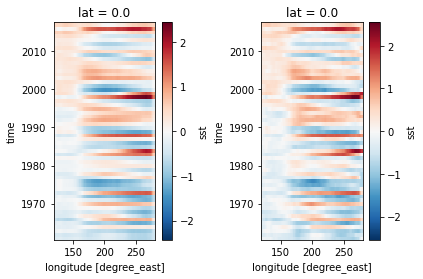

In [ ]:
e2x = np.real(e[:,1])*eq_sst_an_anom
u2 = e2x.sum(dim='lon')
x_PCA2 = np.real(e[:,1])*(1+0*eq_sst_an_anom)*u2

e3x = np.real(e[:,2])*eq_sst_an_anom
u3 = e3x.sum(dim='lon')
x_PCA3 = np.real(e[:,2])*(1+0*eq_sst_an_anom)*u3

PCS3 = x_PCA1+x_PCA2+x_PCA3
plt.subplot(1,5,(1,2))
PCS3.plot()
plt.subplot(1,5,(4,5))
eq_sst_an_anom.plot()

The 1st PCA is basically a clean representation of the El Nino Southern Osciallation (ENSO). Lets compare it to a more crude index for El Nino (NINO34).

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


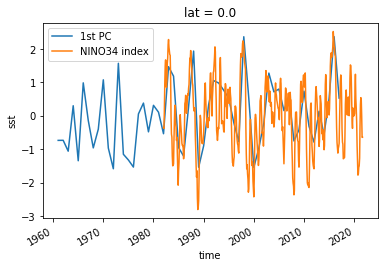

In [ ]:
noaa_nino34 = pd.read_csv('https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices',
                          sep=r" ", skipinitialspace=True,
                          parse_dates={'time': ['YR','MON']},
                          index_col='time')['NINO3.4']
nino34 = noaa_nino34-noaa_nino34.mean()
u1norm = u1/u1.std()
u1norm.plot(label='1st PC')
nino34.plot(label='NINO34 index')
plt.legend()

## 4. Exercise

Split into small teams and work on one of the following:



*   Computing PCAs of 2D data in equatorial Pacific;
*   Graphical represenations of the eigenvalue spectra;
*   Redo-ing the PCAs using correlations rather than covariance;
*   Visualising the data in terms of the 1st 2 PCAs; and
*   Computing the time-series PCA of the SST data at one point.


